# Algoritmos Supervisados

En esta sesión comprobaremos aplicaremos una técnica básica de análisis de series temporales y posteriormente, aplicaremos técnicas de ML a dicha serie.

Entre algoritmos supervisados para "series" y predicciones sobre valores (Regressión problem), disponemos de:

- Linear regressión / Regresión Lineal: https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal <br/>
<img style=" background-color: #FFF;" src="images/linearregression.png" width=20%/>
- Regresión logística: https://es.wikipedia.org/wiki/Regresi%C3%B3n_log%C3%ADstica
- Máquinas de vectores de soporte / SVM: https://es.wikipedia.org/wiki/M%C3%A1quinas_de_vectores_de_soporte
- CART / Classification And Regression Trees https://www.nature.com/articles/nmeth.4370
- Gradient Boosting / Potenciación del gradiente: https://es.wikipedia.org/wiki/Gradient_boosting
- Random Forest / Bosques aleatorios: https://es.wikipedia.org/wiki/Random_forest
- Artificial Neural Networks (*):  https://en.wikipedia.org/wiki/Artificial_neural_network
- K-vecinos cercanos / K-nearest neighbors (k-nn): https://es.wikipedia.org/wiki/K_vecinos_m%C3%A1s_pr%C3%B3ximos
- Análisis Discriminantel Lineal / LDA: https://es.wikipedia.org/wiki/An%C3%A1lisis_discriminante_lineal
- ...


Algunas están implementadas en la librería de python **scikit-learn**:
 https://scikit-learn.org/stable/supervised_learning.html


<img src="images/ModelSelection_ref_book_5.png" width=90%/>

> Fuente: [5] Machine Learning & Data Science Blueprints for Finance



## Creación del caso de estudio 

¡Necesitamos datos! Principalmente, datos con índices de tiempo: **series temporales**.

Por ello, vamos a instalar una librería que nos proporcionará fácilmente datos de juego: pandas_datareader. (Paso 0)

Y con una seríe temporal  podemos descomponerla y aplicar predicción:
- Descomposición aditiva o multiplicativa: $Y[t] = T[t] + S[t] + e[t]$ (Paso 1)
- Modelos "tradiccionales" de predicción: ARIMA, SARIMA,... (Paso 2)


In [2]:
%pip install pandas_datareader


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [39]:
# Paso 0
import pandas as pd
import pandas_datareader.data as web
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
stk_data = web.DataReader(stk_tickers, 'yahoo')   
print(type(stk_data))

<class 'pandas.core.frame.DataFrame'>


In [41]:
print(stk_data) # Python tip: una invocación stk_data.__rep__

Attributes   Adj Close                              Close              \
Symbols           MSFT         IBM      GOOGL        MSFT         IBM   
Date                                                                    
2017-12-18   81.345322  115.344635  54.254501   86.379997  146.587006   
2017-12-19   80.827385  115.269394  53.988998   85.830002  146.491394   
2017-12-20   80.535454  115.058784  53.678001   85.519997  146.223709   
2017-12-21   80.516624  113.968010  53.542500   85.500000  144.837479   
2017-12-22   80.526031  114.720268  53.443001   85.510002  145.793503   
...                ...         ...        ...         ...         ...   
2022-12-12  252.509995  149.210007  93.309998  252.509995  149.210007   
2022-12-13  256.920013  150.570007  95.629997  256.920013  150.570007   
2022-12-14  257.220001  149.860001  95.070000  257.220001  149.860001   
2022-12-15  249.009995  142.360001  90.860001  249.009995  142.360001   
2022-12-16  243.970001  139.339996  89.845001  243.

In [5]:
stk_data.columns # ¿Cómo es el índice de acceso a los datos?

MultiIndex([('Adj Close',  'MSFT'),
            ('Adj Close',   'IBM'),
            ('Adj Close', 'GOOGL'),
            (    'Close',  'MSFT'),
            (    'Close',   'IBM'),
            (    'Close', 'GOOGL'),
            (     'High',  'MSFT'),
            (     'High',   'IBM'),
            (     'High', 'GOOGL'),
            (      'Low',  'MSFT'),
            (      'Low',   'IBM'),
            (      'Low', 'GOOGL'),
            (     'Open',  'MSFT'),
            (     'Open',   'IBM'),
            (     'Open', 'GOOGL'),
            (   'Volume',  'MSFT'),
            (   'Volume',   'IBM'),
            (   'Volume', 'GOOGL')],
           names=['Attributes', 'Symbols'])

In [6]:
stk_data[('Adj Close',  'MSFT')] #Hagamos una prueba

Date
2017-12-18     81.345337
2017-12-19     80.827393
2017-12-20     80.535461
2017-12-21     80.516609
2017-12-22     80.526054
                 ...    
2022-12-09    245.419998
2022-12-12    252.509995
2022-12-13    256.920013
2022-12-14    257.220001
2022-12-15    249.009995
Name: (Adj Close, MSFT), Length: 1258, dtype: float64

In [7]:
%pip install statsmodels


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


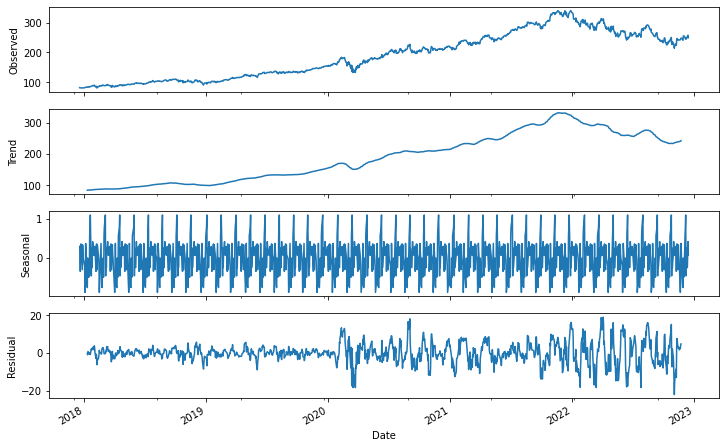

In [8]:
# Paso 1
import matplotlib.pyplot as plt
import statsmodels.api as sm
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

res = sm.tsa.seasonal_decompose(stk_data[('Adj Close',  'MSFT')],period=30)
#res.plot()

fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(12,8))
res.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
res.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
res.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
res.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')
plt.show()

In [42]:
# Paso 2.a  Cargamos/Fit/Entrenamos ARIMA 
from statsmodels.tsa.arima_model import ARIMA
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html
close_msft = stk_data[('Adj Close',  'MSFT')]
close_msft.index = close_msft.index.to_period("M") # a mes
print(close_msft.shape)
print(close_msft[-12:])


(1259,)
Date
2022-12    254.690002
2022-12    255.020004
2022-12    250.199997
2022-12    245.119995
2022-12    244.369995
2022-12    247.399994
2022-12    245.419998
2022-12    252.509995
2022-12    256.920013
2022-12    257.220001
2022-12    249.009995
2022-12    243.970001
Freq: M, Name: (Adj Close, MSFT), dtype: float64


In [10]:
mod = sm.tsa.arima.ARIMA(endog=close_msft, order=(3, 1, 0))
#Un 3 por autoregression, 1 para hacer la serie estacionaria, y una media móvil de 0.
modfit = mod.fit()
print(modfit.summary())


                                 SARIMAX Results                                 
Dep. Variable:     ('Adj Close', 'MSFT')   No. Observations:                 1258
Model:                    ARIMA(3, 1, 0)   Log Likelihood               -3466.704
Date:                   Fri, 16 Dec 2022   AIC                           6941.408
Time:                           11:54:10   BIC                           6961.954
Sample:                       12-31-2017   HQIC                          6949.130
                            - 12-31-2022                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1271      0.019     -6.827      0.000      -0.164      -0.091
ar.L2         -0.0113      0.019     -0.594      0.553      -0.049       0.026
ar.L3         -0.0360      0

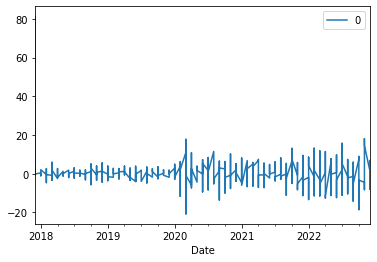

                 0
count  1258.000000
mean      0.222182
std       4.446338
min     -20.787652
25%      -1.349707
50%       0.210157
75%       1.835138
max      81.345337


In [11]:
residuals = pd.DataFrame(modfit.resid)
residuals.plot()
plt.show()
print(residuals.describe()) # más o menos valores cercanos al 0 ok

In [12]:
# Paso 2.b Predecimos con ARIMA
close_msft = stk_data[('Adj Close',  'MSFT')]
close_msft.index = close_msft.index.to_period("M") # a mes

thres = 0.7
split_samples = int(len(close_msft)*thres)
train, test = close_msft[:split_samples],close_msft[split_samples:]
print(train.shape,test.shape)

(880,) (378,)


In [45]:
import math
from sklearn.metrics import mean_squared_error

predictions = []
history = train.to_list()

for i,y in enumerate(test):
    model = sm.tsa.arima.ARIMA(endog=history, order=(3, 1, 0))
    modelfit = model.fit()
    ypred = modelfit.forecast()
    predictions.append(ypred)
    #history.append(y)
    if i%20==0:
        print("%i Prediction: %.2f - Expected=%.2f"%(i,ypred,y))


rmse = math.sqrt(mean_squared_error(test,predictions))
print("RMSE: %.4f"%rmse)

0 Prediction: 256.53 - Expected=256.06
20 Prediction: 256.53 - Expected=273.41
40 Prediction: 256.53 - Expected=290.78
60 Prediction: 256.53 - Expected=296.46
80 Prediction: 256.53 - Expected=289.63
100 Prediction: 256.53 - Expected=332.22
120 Prediction: 256.53 - Expected=331.86
140 Prediction: 256.53 - Expected=310.97
160 Prediction: 256.53 - Expected=303.10
180 Prediction: 256.53 - Expected=276.89
200 Prediction: 256.53 - Expected=312.69
220 Prediction: 256.53 - Expected=279.74
240 Prediction: 256.53 - Expected=271.08
260 Prediction: 256.53 - Expected=255.57
280 Prediction: 256.53 - Expected=279.36
300 Prediction: 256.53 - Expected=267.34
320 Prediction: 256.53 - Expected=236.78
340 Prediction: 256.53 - Expected=246.56
360 Prediction: 256.53 - Expected=242.05
RMSE: 37.5840


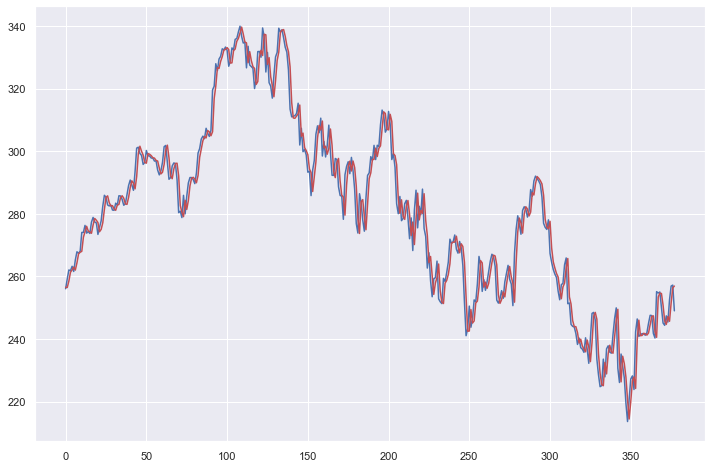

In [44]:
fig, ax = plt.subplots()
ax.plot(test.to_list(),color="b")
ax.plot(predictions,color="r")
plt.show()

### Cuestiones
- ¿Qué ocurre si el modelo no se entrena con cada nueva observación?
- ¿Qué ocurre si cambiamos de modelo ARIMA(1,0,0) o ARIMA(5,1,2)?
- ¿Qué ocurre si reducimos el threshold de entreno?
- ¿Qué ocurre si el periodo de la serie no es mensual?

## Estructuración de aplicaciones para aplicar algoritmos supervisados

El objetivo de nuestro analisis será predecir el valor del cierre de MSFT en función del valor del cierre de IBM y GOOGLE y el uso de dos indices Dow Jones y S&P500

In [15]:
# 1. Carga de datos / Loading data

from sklearn.linear_model import LinearRegression
import pandas as pd
import pandas_datareader.data as web
import numpy as np

stk_tickers = ['MSFT', 'IBM', 'GOOGL']
stk_data = web.DataReader(stk_tickers, 'yahoo')   # from Yahoo Finance
data = stk_data[('Adj Close',  'MSFT')]

idx_tickers = ['SP500', 'DJIA'] #S&P500 y Dow Jone index
idx_data = web.DataReader(idx_tickers, 'fred')    # from FRED 


In [46]:
# Tomamos un periodo de 5 dias, de valores medios sobre los indices y cierres de  L - V.
# Primero, unimos lo datos en un DF
print(type(stk_data))
print(type(idx_data))
print(stk_data.index)
print(idx_data.index)
# Ambos son DF. Entonces es una operación de Merge
dataset = stk_data.merge(idx_data, how="inner",left_index=True,right_index=True)
print(dataset)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex(['2017-12-18', '2017-12-19', '2017-12-20', '2017-12-21',
               '2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2018-01-02',
               ...
               '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08',
               '2022-12-09', '2022-12-12', '2022-12-13', '2022-12-14',
               '2022-12-15', '2022-12-16'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)
DatetimeIndex(['2017-12-18', '2017-12-19', '2017-12-20', '2017-12-21',
               '2017-12-22', '2017-12-25', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29',
               ...
               '2022-12-02', '2022-12-05', '2022-12-06', '2022-12-07',
               '2022-12-08', '2022-12-09', '2022-12-12', '2022-12-13',
               '2022-12-14', '2022-12-15'],
              dtype='datetime64[ns]', name='DATE', length=1304, freq=

/var/folders/6j/7gfvt_29797dypw8t1wttblw0000gn/T/ipykernel_54262/3488023329.py:8: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  dataset = stk_data.merge(idx_data, how="inner",left_index=True,right_index=True)


In [47]:
# Reconvertimos la frecuencia agrupando los valores.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html
data5days = dataset.resample("1W-MON").mean()  # averaging all values along 5 days starting on Mondays 

data5days.head()


,"(Adj Close, MSFT)","(Adj Close, IBM)","(Adj Close, GOOGL)","(Close, MSFT)","(Close, IBM)","(Close, GOOGL)","(High, MSFT)","(High, IBM)","(High, GOOGL)","(Low, MSFT)","(Low, IBM)","(Low, GOOGL)","(Open, MSFT)","(Open, IBM)","(Open, GOOGL)","(Volume, MSFT)","(Volume, IBM)","(Volume, GOOGL)",SP500,DJIA
2017-12-18,81.345322,115.344635,54.254501,86.379997,146.587006,54.254501,87.500000,147.399612,54.324501,86.230003,146.472275,53.518501,87.120003,146.835571,53.822498,22283800.0,5327069.00,30292000.0,2690.1600,24792.2000
2017-12-25,80.601374,114.754114,53.663125,85.590000,145.836521,53.663125,86.094999,146.873810,53.943000,85.074999,145.521034,53.468875,86.000000,146.436424,53.866626,19834050.0,3934685.75,24626500.0,2682.1575,24754.4375
2018-01-01,80.603731,115.363449,52.942499,85.592501,146.610901,52.942499,85.872501,147.198849,53.250251,85.325001,146.206978,52.788749,85.622499,146.469883,53.162251,13470225.0,2783144.75,21047500.0,2681.0675,24769.3100
2018-01-08,82.094936,120.422417,54.849899,87.175999,153.040152,54.849899,87.494002,153.680688,55.089000,86.614000,151.441681,54.325101,86.927998,152.311667,54.384900,23195460.0,6617749.20,28806000.0,2724.7440,25080.1380
2018-01-15,83.275845,123.249056,55.820375,88.430000,156.632412,55.820375,88.707500,157.394836,55.967125,87.740000,155.805450,55.333376,88.327499,156.699329,55.598125,20054225.0,4535011.50,27138000.0,2763.3300,25533.2125


In [18]:
# Limpiamos series innecesarias
columns_to_remove = [0,1,2,6,7,8,9,10,11,12,13,14]
data5days = data5days.drop(data5days.columns[columns_to_remove],axis=1)

# Y renombramos columnas
columns_names = ["CloseMSFT","CloseIBM","CloseGOOGL","VolMSFT","VolIBM","VolGOOGL","SP500","DJIA"]
data5days.columns = columns_names
data5days.head()


,CloseMSFT,CloseIBM,CloseGOOGL,VolMSFT,VolIBM,VolGOOGL,SP500,DJIA
2017-12-18,86.379997,146.587006,54.254501,22283800.0,5327069.00,30292000.0,2690.1600,24792.2000
2017-12-25,85.590000,145.836521,53.663125,19834050.0,3934685.75,24626500.0,2682.1575,24754.4375
2018-01-01,85.592501,146.610901,52.942499,13470225.0,2783144.75,21047500.0,2681.0675,24769.3100
2018-01-08,87.175999,153.040152,54.849899,23195460.0,6617749.20,28806000.0,2724.7440,25080.1380
2018-01-15,88.430000,156.632412,55.820375,20054225.0,4535011.50,27138000.0,2763.3300,25533.2125


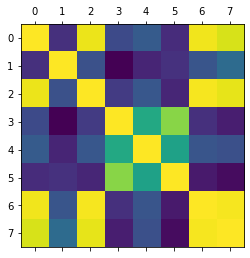

In [19]:
import matplotlib.pyplot as plt
correlation = data5days.corr()
plt.matshow(correlation)


In [20]:
%pip install seaborn


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

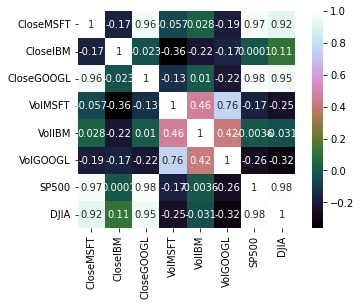

In [21]:
import seaborn as sns
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

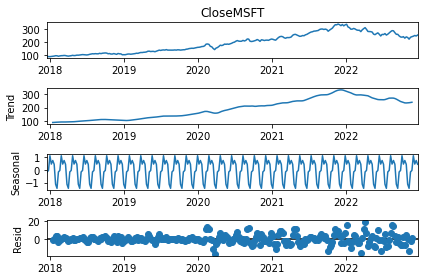

In [22]:
res = sm.tsa.seasonal_decompose(data5days.CloseMSFT,period=8) # que implica este 8?
fig = res.plot()
plt.show()

In [23]:
data5days[data5days.columns[1:]]

,CloseIBM,CloseGOOGL,VolMSFT,VolIBM,VolGOOGL,SP500,DJIA
2017-12-18,146.587006,54.254501,2.228380e+07,5.327069e+06,3.029200e+07,2690.1600,24792.2000
2017-12-25,145.836521,53.663125,1.983405e+07,3.934686e+06,2.462650e+07,2682.1575,24754.4375
2018-01-01,146.610901,52.942499,1.347022e+07,2.783145e+06,2.104750e+07,2681.0675,24769.3100
2018-01-08,153.040152,54.849899,2.319546e+07,6.617749e+06,2.880600e+07,2724.7440,25080.1380
2018-01-15,156.632412,55.820375,2.005422e+07,4.535012e+06,2.713800e+07,2763.3300,25533.2125
...,...,...,...,...,...,...,...
2022-11-21,145.853998,97.736000,2.652302e+07,4.052840e+06,2.935766e+07,3962.4720,33627.8080
2022-11-28,148.099998,97.255001,1.828830e+07,4.083400e+06,1.956138e+07,4005.2250,34122.1625
2022-12-05,148.126001,99.418001,2.730194e+07,3.862280e+06,2.764312e+07,4036.9700,34242.8580
2022-12-12,147.762003,94.354001,2.336584e+07,3.313000e+06,2.916000e+07,3952.7260,33691.4480


In [24]:
# Aplicación de modelos de supervisado
from re import X
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

models = [LinearRegression,SVR,RandomForestRegressor]

X = data5days[data5days.columns[1:]]
Y = data5days.CloseMSFT

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=33)


In [25]:
test_results = []
train_results = []
names = []
for model in models:
    print("Appliying model: %s"%model.__name__)
    names.append(model.__name__)
    res = model().fit(X=X_train,y=y_train)
    train_result = mean_squared_error(res.predict(X_train), y_train) 
    train_results.append(train_result)

    test_result = mean_squared_error(res.predict(X_test), y_test)
    test_results.append(test_result)




Appliying model: LinearRegression
Appliying model: SVR
Appliying model: RandomForestRegressor


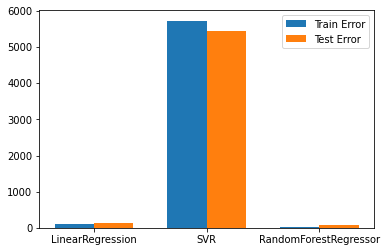

In [26]:
ind = np.arange(len(models)) 
width = 0.35 # the width of the bars

fig,ax = plt.subplots()
plt.bar(ind - width/2, train_results, width=width, label='Train Error')
plt.bar(ind + width/2, test_results, width=width, label='Test Error')
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.show()

## Más allá de la regresión lineal simple

En la sesión de hoy seguiremos trabajando con las técnicas de regresión, profundizaremos
en las técnicas de regresión lineal y veremos otras técnicas de regresión no lineal.
Por otra parte revisaremos las métricas más usadas para este problema. Finalmente
trabajaremos en la automatización de los procesos de aprendizaje automático.

1. Uso de la regularización
2. Regresión no lineal: un ejemplo
3. Métricas de regresión
4. Buenas prácticas I: Conjuntos de entrenamiento y test.


### 1. Uso de la regularización

Una forma de encontrar una buena relación entre el sesgo y la varianza es ajustar la complejidad del modelo a través de
**la regularización**. La regularización es un método muy útil para manejar
colinealidad (alta correlación entre características), filtrar el ruido de los datos y
eventualmente evitará el _overfitting_. El concepto detrás de la regularización es introducir
información adicional (sesgo) para penalizar los valores extremas de los parámetros.

Si tenemos que la expresión para una regresión lineal es: $$y = w_0x_0+w_1x_1+...+w_nx_n=\sum^m_{i=0} w_i X_{i}$$

Y la función que queremos minimizar es: $$J(w) = \sum^n_{i=1}(y^{(i)}-\hat{y}^{(i)})^2 $$


### Ridge Regression
La _Ridge Regression_ es un modelo que usa una penalización aplicando la norma L2 donde simplemente agregamos
la suma al cuadrado de los pesos de nuestra función de coste:

$$ J(w)_{Ridge} = \sum^n_{i=1}(y^{(i)}-\hat{y}^{(i)})^2 + \lambda\| w \|_2$$

El uso de esta regresión sería el siguiente:

In [27]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)

Al aumentar el valor del hiperparámetro $\lambda$, aumentamos la fuerza de la regularización
y encogemos los pesos de nuestro modelo. Hay que tener en cuenta que no regularizamos
el término del _intercepto_ ($w_0$).

### Lasso Regression (L1)
Un enfoque alternativo que puede conducir a modelos dispersos es la regresión LASSO.
Según sea el valor del término de regularización, ciertos pesos pueden coger el valor cero,
lo que hace que este tipo de regresión LASSO también sea útil como técnica de selección de características
supervisada.

La función a minimizar en este caso es:
$$ J(w)_{Lasso} = \sum^n_{i=1}(y^{(i)}-\hat{y}^{(i)})^2 + \lambda\| w \|_1$$

El uso de esta regresión sería el siguiente:

In [28]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

### Elastic Net Regression

Sin embargo, una limitación de LASSO es que selecciona como máximo $n$ variables si $ m > n $.
_Elastic Net_ ofrece un buen compromiso entre la _Ridge_ _regression_  y LASSO, que tiene una
Penalización L1 para generar una selección de características y penalización L2 para superar algunas de las limitaciones de la regresión LASSO, como es el número de variables seleccionadas.

La función a minimizar en este caso es:

$$ J(w)_{Elasticnet} = \sum^n_{i=1}(y^{(i)}-\hat{y}^{(i)})^2 + \lambda_1 \sum^n_{i=1} w^2_j + \lambda_2 \sum^n_{i=1} w_j $$

El uso de esta regresión sería el siguiente:

In [29]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)

### Regresión polinómica
La regresión polinomial es un caso especial de regresión lineal en el que se construyen nuevas características en
función del grado del polinomio que se quiera construir.
En las secciones anteriores, hemos asumido una relación lineal entre las variables del modelo y
la variable objetivo. Una forma de no tener en cuenta el supuesto de linealidad es
usar un modelo de regresión polinomial, es decir agregando términos polinomiales.

$$ y = w_0 + w_1x + w_2x^2 + ... + w_dx^d $$

donde $d$ es el grado del polinomio. Aunque podemos usar un polinomio
para modelar una relación no lineal, todavía se considera una
modelo de regresión lineal debido a los coeficientes $w$.


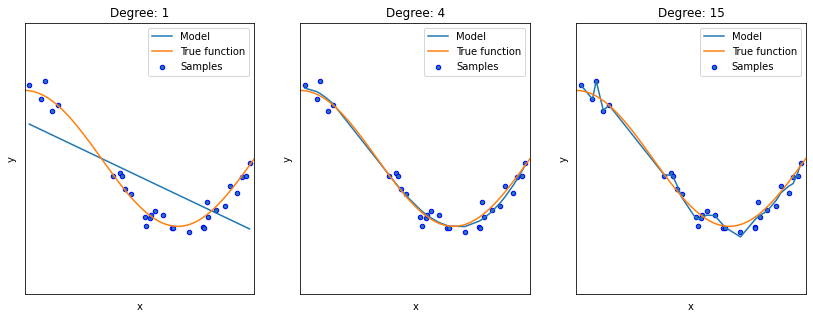

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    
    linear_regression = LinearRegression()
    polynomial_features = PolynomialFeatures(degree=degrees[i])
    polynomial = polynomial_features.fit_transform(X[:, np.newaxis])
    
    linear_regression.fit(polynomial, y)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X, linear_regression.predict(polynomial), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")

    plt.title( "Degree: " + str(degrees[i]))
    
plt.show()

### Regresión no lineal: un ejemplo

Cuando queremos resolver un problema usando un modelo más complejo podemos elegir alguno de los siguientes:

- Árboles de regresión
- Bosques de regresión
- SVM para la regresión
- Y todos los modelos que existen...

Realizaremos un ejercicio con los árboles de decisión debido a que son fáciles de entender y que en sesiones futuras
trabajaremos con los análogos de los Bosques de regresión y las SVM para problemas de clasificación.

Los **árboles de decisión (DT)** son un método de aprendizaje supervisado no paramétrico que se utiliza para
clasificación y regresión. El objetivo es crear un modelo que prediga el valor de una variable objetivo mediante
el aprendizaje de reglas de decisión simples inferidas de las características de los datos. Un árbol puede verse como
una aproximación de una función a trozos.

En sci-kit la clase que modela este tipo de árboles se llama `DecisionTreeRegressor` [enlace](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)

Veamos un ejemplo sencillo:

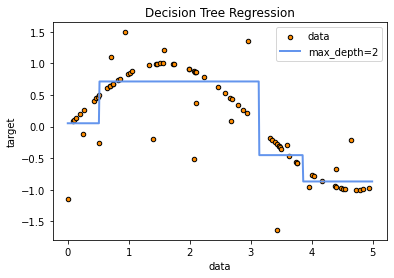

In [31]:
# Importamos las librerias necesarias
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Generamos un conjunto de datos (función seno)
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Entrenamos el modelo

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X, y)

# Realizamos una predicción
X_test = np.expand_dims(np.arange(0.0, 5.0, 0.01), 1)
y_1 = regr_1.predict(X_test)

# Mostramos los resultados
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Vamos a ver la estructura del primer árbol que hemos entrenado para entender mejor el proceso que ha seguido:

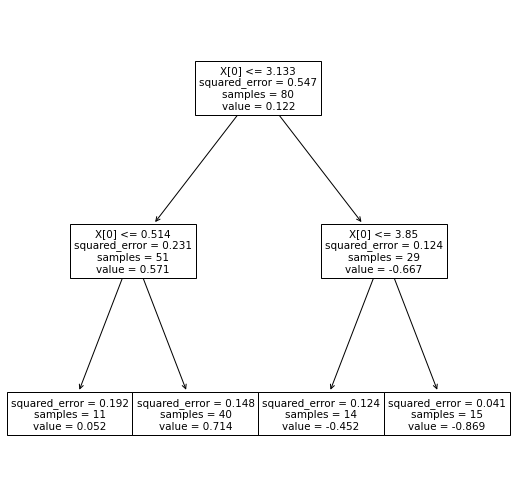

In [32]:
from sklearn import tree
plt.figure(figsize=(9,9))
tree.plot_tree(regr_1);

**Ejercicio**

- Cambia el parámetro _max_depth_ del modelo. Que pasa si es 1? Que pasa si es 5 o mayor?
- Visualiza el árbol resultante. 
- Cuál es la medida de Score de este método (mirar documentación)? Como cambia al permitir árboles más profundos?
- Busca en la documentación de Sci-kit de los Bosques de Regresión ( _RandomForestRegressor_ ) compara el score obtenido cuando incrementamos el número de árboles, manteniendo la misma profundidad.

## Métricas para problemas de regression

Las métricas más comunes en los problemas de regresión son el **error cuadrático** y el **error absoluto**, y sus distintas modificaciones.

### 3.1 Errores cuadráticos

El **error cuadrático (Squared Error)** de un valor predicho con respecto al valor real, se calcula cómo:

$$ SE = \sum_j\left[\hat{y}_j - y_j\right]^2$$


**Error cuadrático medio (Mean Squared Error)** Da una idea del error de nuestras predicciones dando más peso a los errores grandes.

$$ MSE = \frac{1}{m}\sum_j^m \left[\hat{y}_j - y_j\right]^2 $$

**Raiz del error cuadrático medio (Root Mean Square Error)** La raíz cuadrada del MSE produce el error de la raíz cuadrada de la media o la desviación de la raíz cuadrada media (RMSE o RMSD). Tiene las mismas unidades que la cantidad que estima. Para un estimador sin sesgo (bies), el RMSE es la raíz cuadrada de la varianza, es decir la desviación estandar.

$$ RMSE = \sqrt{\frac{1}{m}\sum_j^m \left[\hat{y}_j - y_j\right]^2} $$



A pesar de ser una de las métricas más utilizadas, tiene el inconveniente de ser sensible a los valores extremos (outliers). Cuando este comportamiento pueda suponer un problema, los **errores absolutos** pueden darnos una mejor medida de rendimiento.

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set(rc={'figure.figsize':(12, 8)})

In [34]:
## Escribe una función que devuelva el MSE y el RMSE dados dos arrays de numpy

def MSE(x1, x2):
    """
    Returns the Root Mean Squared Error of the two input vectors
    """
    sq_error = ##
    mean_sq_error = np.##
    return mean_sq_error

def RMSE(x1, x2):
    """
    Returns the Root Mean Squared Error of two vectors. Depends on the MSE function
    """
    mse = MSE(x1, x2)
    root_mse = np.##
    return root_mse

SyntaxError: invalid syntax (820556737.py, line 7)

### 3.2 Errores absolutos

El **error absoluto** (Absolute Error) se define cómo:

$$ AE = \sum_j \left|\hat{y}_j - y_j\right| $$

#### Error absoluto medio (Mean Absolute Error)

Es más robusto a los valores extremos y su interpretabilidad es más alta que la del RMSE ya que también está en las unidades de la variable a predecir con la ventaja de que el dato no ha sufrido ninguna transformación.

$$ MAE = \frac{1}{m} \sum_j^m \left|\hat{y}_j - y_j\right| $$

#### Error absoluto medio porcentual (Mean Average Percentage Error)

A pesar de su simpleza, presenta varios inconvenientes a la hora de usarlo de forma práctica. Por ejemplo, **no puede usarse cuando el valor de referencia es 0**. Además, **si se usa para elegir métodos predictivos seleccionará de forma sistemática un metodo que prediga valores bajos.**
[wiki](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)

$$ MAPE = \frac{1}{m} \sum_j^m \left|\frac{\hat{y}_j - y_j}{y_j}\right| $$

### 3.3 Generalización

Las dos **métricas** expuestas anteriormente pueden considerarse como **distancias entre el vector de valores reales y el predicho**. De hecho, el RMSE corresponde a la **distancia euclidiana**, también conocida como norma $l_2$ o $\lVert{v}\rVert_2$.

Por otro lado, el MAE corresponde a la norma $l_1$ o $\lVert{v}\rVert_1$. A esta distancia se la conoce como **distancia de manhattan**, porque sólo se puede viajar de un bloque a otro de la ciudad a traves de calles ortogonales.

De forma general, una norma $l_k$ o $\lVert{v}\rVert_k$ se calcula:

$$\lVert{v}\rVert_k = \left(|v_0|^k + ...+ |v_m|^k \right)^\frac{1}{k}$$

El concepto de distancia será particularmente útil en los problemas de segmentación (aprendizaje no supervisado)


### 3.4 Coeficiente de determinación ($R^2$)

El coeficiente determina la calidad del modelo para replicar los resultados, y la proporción de variación de los resultados que puede explicarse por el modelo. El valor más alto obtenible será 1, aunque hay casos en los que puede presentar valores negativos. De forma intuitiva, $R^2$ compara el "fit" de nuestro modelo al de una linea recta horizontal. Dada una regresión lineal simple, un $R^2$ negativo sólo es posible cuando la ordenada en el origen o la pendiente están restringidas de forma que el mejor modelo es peor que una linea horizontal.

Si representamos la **varianza de la variable dependiente** por $\sigma^{2}$ y la **varianza residual** por $\sigma _{r}^{2}$, el coeficiente de determinación viene dado por la siguiente ecuación:

$$ R^{2}=1- \frac{\sigma_{r}^{2}}{\sigma ^{2}}$$


Siendo $\hat{y}_i$ el valor predicho de la muestra i y $y_i$ el valor real, el $R^2$ estimado sobre $n_{\text{muestras}}$ se define como:

$$ R^2(y, \hat{y}) = 1 - \frac{\sum_{i=0}^{n_{\text{samples}} - 1} (y_i - \hat{y}_i)^2}{\sum_{i=0}^{n_\text{samples} - 1} (y_i - \bar{y})^2}$$
donde $$ \bar{y} =  \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}} - 1} y_i$$

#### 3.4.1 Consideraciones R²

1. R² no puede determinar si los coeficientes y las predicciones tienen bies: Hay que checkear los residos --> Si observamos patrones en los plots de residuos es indicativo de un mal ajuste a pesar de un R2 elevado

1. Cada vez que añadimos un predictor a un modelo, el R² aumenta aunque sea por suerte, pero nunca decrece. Por consiguiente, un modelo con muchos terminos puede parecer mejor simplemente por el hecho de tener más terminos. Para prevenir este efecto, podemos usar el **adjusted R²**, una versión modificada que se ajusta al número de predictores en el modelo. De ésta forma, el R² solo aumenta si el nuevo término mejora el modelo más que por mera suerte. Siempre es más bajo que el R²

$$\bar{R}^2 = 1 - \frac{N-1}{N-k-1}(1-R^2)$$


n – numero de observaciones

k – numero de parametros